# Run conversion script for Raw_BlackRock_withCognitiveEvents

In [2]:
from nelson_lab_to_nwb.blackrock_sessions_converter import session_to_nwb

session_to_nwb(
    output_folder_path="output_blackrock",
    blackrock_raw_file_path="/media/luiz/Seagate Basic/storage/catalystneuro/nelson_lab/Raw_BlackRock_withCognitiveEvents/BlackRock_raw_H0.2_071823001.ns6",
    blackrock_lfp_file_path="/media/luiz/Seagate Basic/storage/catalystneuro/nelson_lab/Raw_BlackRock_withCognitiveEvents/BlackRock_raw_H0.2_071823001.ns2",
    blackrock_sorting_file_path="/media/luiz/Seagate Basic/storage/catalystneuro/nelson_lab/Raw_BlackRock_withCognitiveEvents/BlackRock_raw_H0.2_071823001.nev",
    behavioral_events_file_path="/media/luiz/Seagate Basic/storage/catalystneuro/nelson_lab/Raw_BlackRock_withCognitiveEvents/CognitiveBehavioral_Raw_H0.2.CSV",
    behavioral_video_file_path="/media/luiz/Seagate Basic/storage/catalystneuro/nelson_lab/Raw_BlackRock_withCognitiveEvents/BlackRock_exampleVideo_H0.2.avi",
    user_metadata_file_path="/mnt/shared_storage/Github/nelson-lab-to-nwb/src/nelson_lab_to_nwb/blackrock_sessions_converter/metadata_example.yaml",
    behavioral_events_time_offset=5,
    stub_test=False,
    overwrite=True,
    verbose=True,
)

Source data is valid!
Metadata is valid!
conversion_options is valid!
Setting aligned timestamps for video Videos.


/home/luiz/anaconda3/envs/nelson_lab_to_nwb_env/lib/python3.12/site-packages/pynwb/file.py:146: UserWarning: Date is missing timezone information. Updating to local timezone.
  args_to_set['date_of_birth'] = _add_missing_timezone(date_of_birth)
/home/luiz/anaconda3/envs/nelson_lab_to_nwb_env/lib/python3.12/site-packages/pynwb/file.py:472: UserWarning: Date is missing timezone information. Updating to local timezone.
  args_to_set['session_start_time'] = _add_missing_timezone(session_start_time)


NWB file saved at output_blackrock/subid012345_20230718T19.nwb!
Conversion complete. NWB file saved to: output_blackrock/subid012345_20230718T19.nwb


'output_blackrock/subid012345_20230718T19.nwb'

# Inspect converted data

In [3]:
from pynwb import NWBHDF5IO
from nwbwidgets import nwb2widget
import matplotlib.pyplot as plt
import numpy as np


io = NWBHDF5IO("output_blackrock/subid012345_20230718T19.nwb", mode='r')
nwbfile = io.read()
nwbfile

,location,group,group_name,channel_name,rel_x,rel_y
id,,,,,,
0,unknown,0 pynwb.ecephys.ElectrodeGroup at 0x140587374956512\nFields:\n description: no description\n device: DeviceEcephys pynwb.device.Device at 0x140587375324880\nFields:\n description: no description\n\n location: unknown\n,0,sig001,450.0,0.0
1,unknown,0 pynwb.ecephys.ElectrodeGroup at 0x140587374956512\nFields:\n description: no description\n device: DeviceEcephys pynwb.device.Device at 0x140587375324880\nFields:\n description: no description\n\n location: unknown\n,0,sig002,600.0,0.0
2,unknown,0 pynwb.ecephys.ElectrodeGroup at 0x140587374956512\nFields:\n description: no description\n device: DeviceEcephys pynwb.device.Device at 0x140587375324880\nFields:\n description: no description\n\n location: unknown\n,0,sig003,150.0,150.0
3,unknown,0 pynwb.ecephys.ElectrodeGroup at 0x140587374956512\nFields:\n description: no description\n device: DeviceEcephys pynwb.device.Device at 0x140587375324880\nFields:\n description: no description\n\n location: unknown\n,0,sig004,300.0,150.0
,location,group,group_name,channel_name,rel_x,rel_y
id,,,,,,
0,unknown,0 pynwb.ecephys.ElectrodeGroup at 0x140587374956512\nFields:\n description: no description\n device: DeviceEcephys pynwb.device.Device at 0x140587375324880\nFields:\n description: no description\n\n location: unknown\n,0,sig001,450.0,0.0
1,unknown,0 pynwb.ecephys.ElectrodeGroup at 0x140587374956512\nFields:\n description: no description\n device: DeviceEcephys pynwb.device.Device at 0x140587375324880\nFields:\n description: no description\n\n location: unknown\n,0,sig002,600.0,0.0
2,unknown,0 pynwb.ecephys.ElectrodeGroup at 0x140587374956512\nFields:\n description: no description\n device: DeviceEcephys pynwb.device.Device at 0x140587375324880\nFields:\n description: no description\n\n location: unknown\n,0,sig003,150.0,150.0


Text(0, 0.5, 'Raw traces')

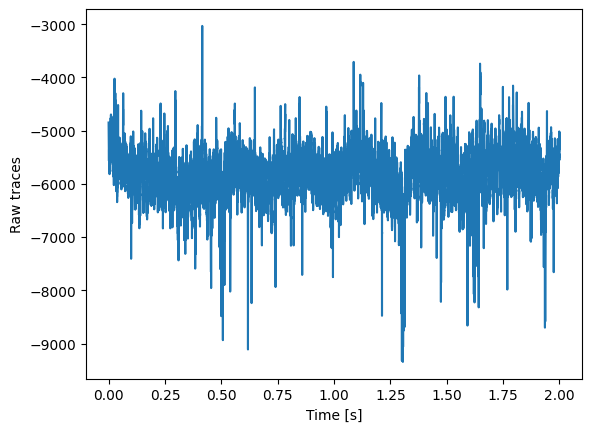

In [27]:
# Electrophysiology traces - Raw
plt.plot(
    np.arange(0, 60000) / nwbfile.acquisition["ElectricalSeries"].rate,
    nwbfile.acquisition["ElectricalSeries"].data[0:60000, 17]
)
plt.xlabel('Time [s]')
plt.ylabel('Raw traces')

Text(0, 0.5, 'Raw traces')

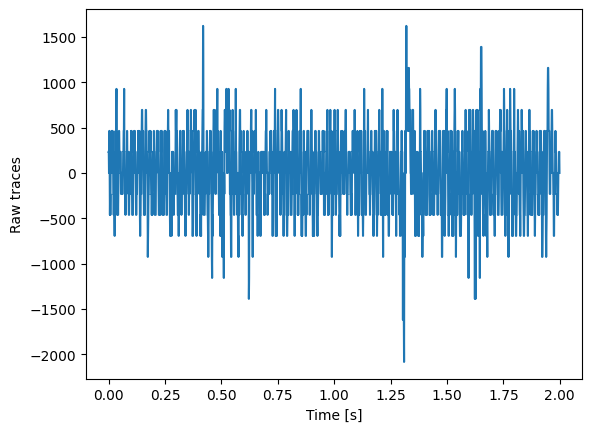

In [37]:
# Electrophysiology traces - LFP
time_series = nwbfile.processing["ecephys"].data_interfaces["LFP"].electrical_series['ElectricalSeries']
plt.plot(
    np.arange(0, 2000) / time_series.rate,
    time_series.data[0:2000, 17]
)
plt.xlabel('Time [s]')
plt.ylabel('Raw traces')

In [38]:
# Units table
nwbfile.units.to_dataframe()

,spike_times,unit_name
id,,
0,"[0.0053, 0.0195, 0.04073333333333334, 0.056933...",0
1,"[0.045566666666666665, 0.05213333333333333, 0....",1
2,"[0.0199, 0.030566666666666666, 0.0491, 0.06463...",2
3,"[0.017033333333333334, 0.021166666666666667, 0...",3
4,"[0.0036333333333333335, 0.0098, 0.118666666666...",4
5,"[0.26076666666666665, 0.27076666666666666, 0.3...",5
6,"[2945.7494, 4662.8541]",6
7,"[0.010966666666666666, 0.017533333333333335, 0...",7
8,"[0.039933333333333335, 0.049, 0.064, 0.0819666...",8


In [39]:
# visualize the full NWB file with interactive widgets
nwb2widget(nwbfile)

In [ ]:
io.close()